## Observations and Insights 

In [234]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
import csv

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df= pd.DataFrame.merge(mouse_metadata,study_results,
                    on="Mouse ID", how="outer")
# Display the data table for preview
merge_df.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [301]:
current_num_m= len(merge_df["Mouse ID"])
print(f"The current number of mice in the study is {current_num_m}")


The current number of mice in the study is 1893


In [302]:
# 1.-----------CLEANING THE DATA

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouse=merge_df.loc[merge_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
print(f"The duplicated mouse in the study is {duplicated_mouse}")


# Get all the data for the duplicate mouse ID. 
clean_study_df= merge_df.drop_duplicates(subset=["Mouse ID","Timepoint"],keep='first', inplace=False)
clean_study_df.loc[clean_df["Mouse ID"]=="g989"]

The duplicated mouse in the study is ['g989']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


In [258]:
# Checking for null values 
na=clean_study_df.isnull().values.any()

# Checking for the sum of null values 
null= clean_study_df.isnull().sum()
null

Mouse ID              0
Drug Regimen          0
Sex                   0
Age_months            0
Weight (g)            0
Timepoint             0
Tumor Volume (mm3)    0
Metastatic Sites      0
dtype: int64

In [304]:
# Checking the number of mice in the clean DataFrame.
num_mice =len(clean_study_df["Mouse ID"])
print(f"The final number of mice in the study with no duplicated is {num_mice}")


The final number of mice in the study with no duplicated is 1888


In [260]:
clean_study_df.dtypes


Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [261]:
clean_study_df["Drug Regimen"].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     156
Name: Drug Regimen, dtype: int64

## Summary Statistics

In [273]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM 
#of the tumor volume for each regimen

mean_tumor = clean_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumor = clean_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
var_tumor = clean_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
std_tumor = clean_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem_tumor = clean_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

statistcs_df= pd.DataFrame({"Mean":mean_tumor, "Median":median_tumor,"Variance":var_tumor, "Stan_Dev":std_tumor, "SEM":sem_tumor})
statistcs_df

,Mean,Median,Variance,Stan_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [274]:
# Drug regime per Tumor volume statistics: in a single line mean, median, variance, standard deviation and sem in one line
stats_tumor = clean_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg([np.mean,np.median,np.var,np.std,st.sem])
stats_tumor

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

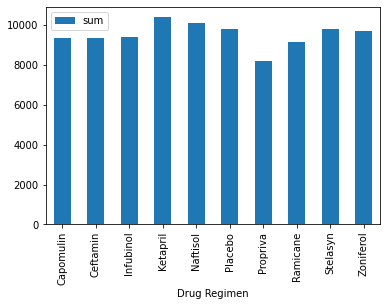

In [392]:
# Generate a bar plot showing the total number of measurements taken per drug regimen using pandas.
total_measures = clean_study_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg([np.sum])
total_measures

#Plotting total measurements
plot_total_measures = total_measures.plot.bar(rot=90)

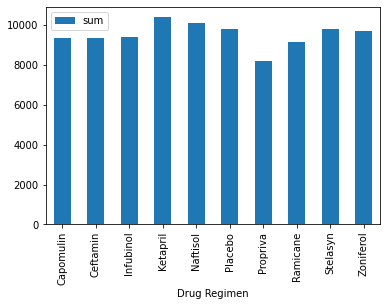

In [387]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
total_measures

#Plotting total measurements
total_measures.plot(kind='bar')

# Turn on the grid
plt.minorticks_off()
plt.show()


In [178]:
# 3.--------Pie Charts

In [299]:
# Find the distribution of female versus male mice using pandas
#--------Male mice
total_measur_male= len(clean_study_df.loc[(clean_study_df["Sex"]== "Male")])
print(f"The number of Male mice in the study is {total_measur_male}")

#--------Female mice
total_measur_female= len(clean_study_df.loc[(clean_study_df["Sex"]== "Female")])
print(f"The number of Male mice in the study is {total_measur_female}")

The number of Male mice in the study is 958
The number of Male mice in the study is 930


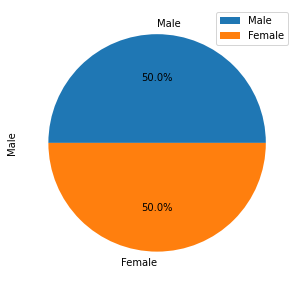

In [396]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

male_female_df = pd.DataFrame({'Male':total_measur_male,'Female':total_measur_female}, index=["Male","Female"])

male_female_plot = male_female_df.plot.pie(y="Male", x="Female", figsize=(5, 5), autopct='%1.1f%%')




([<matplotlib.patches.Wedge at 0x7fef0ad49df0>,
 [Text(-0.749723176393041, -0.9369712689187056, 'Male'),
  Text(0.6872463254420675, 0.8588902654975058, 'Female')],
 [Text(-0.43733851956260716, -0.5465665735359115, '50.7%'),
  Text(0.3748616320593095, 0.46848559936227585, '49.3%')])

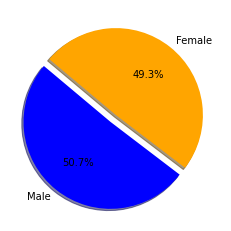

In [402]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [958,930]

# The colors of each section of the pie chart
colors = ["blue", "orange"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)

# Creating the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [404]:
# Calculate the final tumor volume per mouse across four treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

# Final Tumor Volume per mouse per drug regime
final_tumor_vol = clean_study_df.groupby(["Drug Regimen","Mouse ID"])["Tumor Volume (mm3)"].agg([np.max])

# Filtering Drug Regime
per_treatment= final_tumor_vol.loc[(final_tumor_vol["Drug Regimen"]=="Capomulin","Ramicane","Infubinol","Ceftamin"),:]
per_treatment




# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#len(per_treatment)


KeyError: 'Drug Regimen'

In [376]:
filtering = clean_study_df.groupby(["Drug Regimen","Mouse ID"])["Tumor Volume (mm3)"].agg([min]) #.sort_values(by=["Tumor Volume (mm3)"],ascending=False)

# Filtering Drug Regime
#per_treat= filtering.loc[["Capomulin","Ramicane","Infubinol","Ceftamin"]]

filtering.loc[filtering["Drug Regimen"]=="Capomulin","Ramicane","Infubinol","Ceftamin"]







KeyError: 'Drug Regimen'

In [352]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
